In [1]:
#Name: Valerie Hernandez
#Student ID: 2956556
#Table Number: 3
#Table Members: Alexis Ng, Alice Kuang, Eva Morrison, Brooke Jackson
#Assignment Name: Worksheet 12 - The Bootstrap

In [2]:
install.packages('infer')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘patchwork’




In [3]:
install.packages('cowplot')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [4]:
### Run this cell before continuing.
library(tidyverse)
library(repr)
library(digest)
library(infer)
library(cowplot)
options(repr.matrix.max.rows = 6)
source('tests.R')
#source('cleanup.R')

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.4.1
✔ readr   2.1.4     ✔ forcats 1.0.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘testthat’


The following object is masked from ‘package:dplyr’:

    matches


The following object is masked from ‘package:purrr’:

    is_null


The following objects are masked from ‘package:readr’:

    edition_get, local_edition


The following object is masked from ‘package:tidyr’:

    matches




In [5]:
#Question 1.1
answer1.1 <- "false"
test_1.1()

Test passed 🎊
[1] "Success!"


In [7]:
#Question 1.2
answer1.2 <- c(4, 1, 3, 2)
test_1.2()

Test passed 🥇
[1] "Success!"


In [8]:
#Question 1.3
answer1.3 <- "C"
test_1.3()

Test passed 🎉
[1] "Success!"


In [10]:
#Question 1.4
answer1.4 <- "D"
test_1.4()

Test passed 🥇
[1] "Success!"


In [11]:
# run this cell to simulate a finite population
set.seed(4321) # DO NOT CHANGE
can_seniors <- tibble(age = (rexp(2000000, rate = 0.1)^2) + 65) %>% 
    filter(age <= 117, age >= 65)
can_seniors

age
<dbl>
65.09234
92.77292
90.08786
⋮
110.89105
65.00454
108.33006


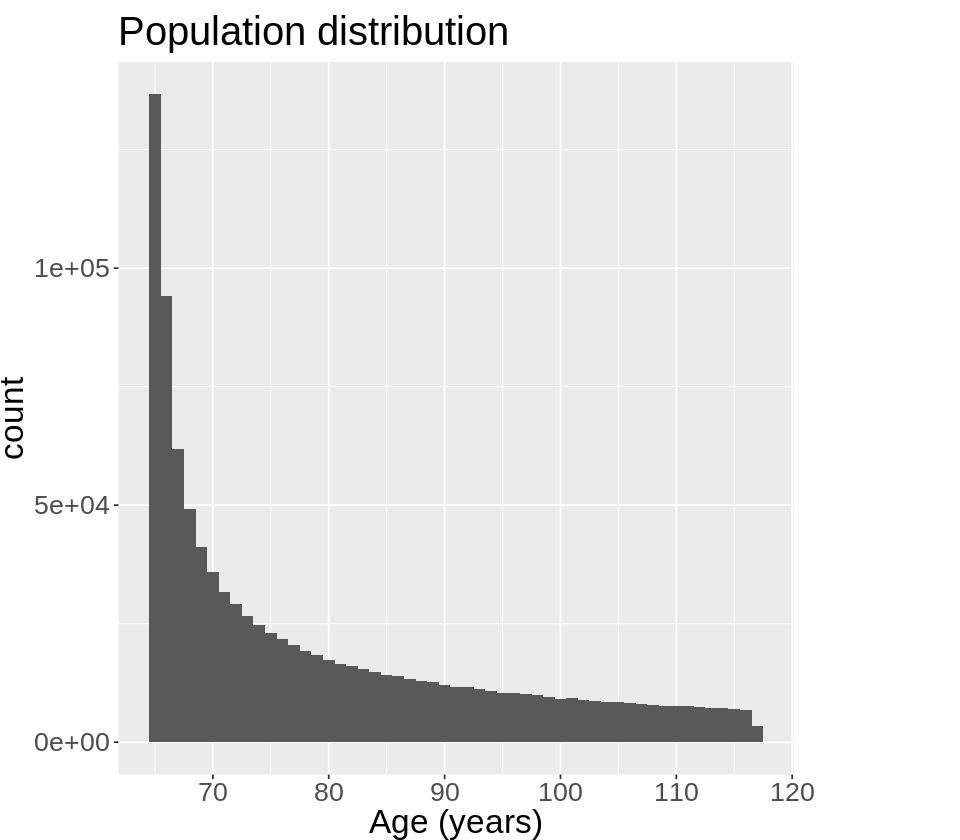

In [12]:
# run this cell 
options(repr.plot.width = 8, repr.plot.height = 7)
pop_dist <- ggplot(can_seniors, aes(age)) + 
    geom_histogram(binwidth = 1) +
    xlab("Age (years)") +
    ggtitle("Population distribution") +
    theme(text = element_text(size = 20), plot.margin = margin(10, 100)) # last x value was getting cut off
pop_dist

In [13]:
# run this cell 
set.seed(12345) 
one_sample <- can_seniors %>% 
    rep_sample_n(40) %>% 
    ungroup() %>% # ungroup the data frame 
    select(age) # drop the replicate column 
one_sample

age
<dbl>
65.07064
66.53276
73.28399
⋮
67.13013
81.51355
75.97632


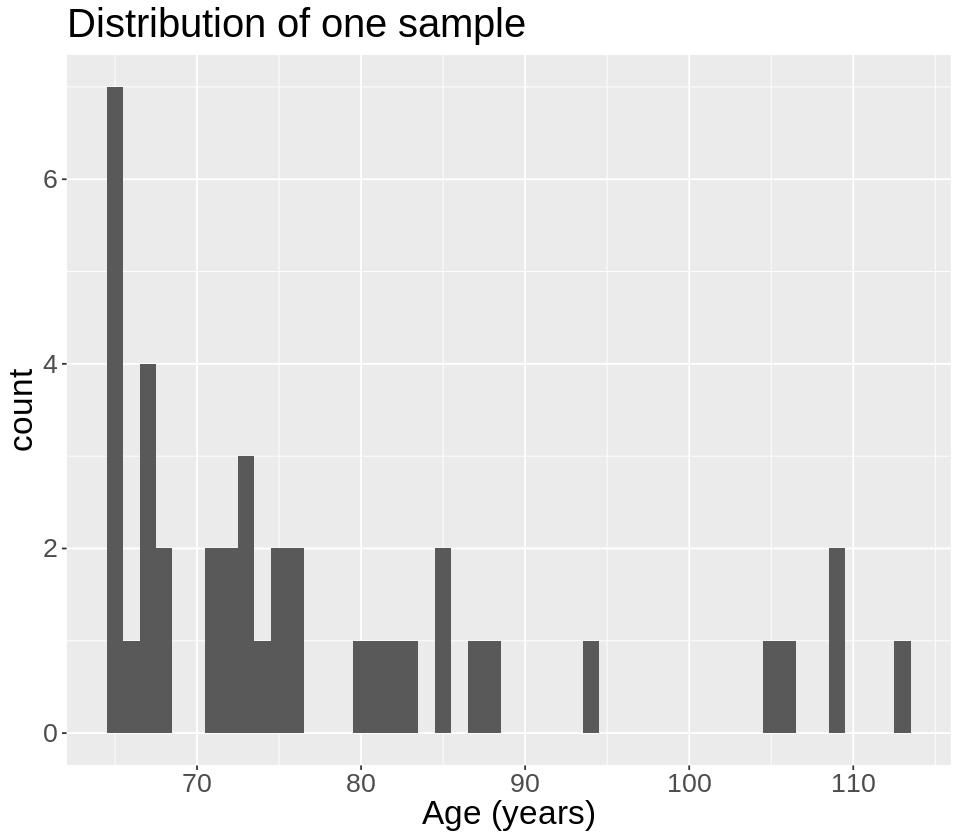

In [14]:
options(repr.plot.width = 8, repr.plot.height = 7)
# run this cell 
one_sample_dist <- ggplot(one_sample, aes(age)) + 
    geom_histogram(binwidth = 1) +
    xlab("Age (years)") +
    ggtitle("Distribution of one sample") +
    theme(text = element_text(size = 20))
one_sample_dist

In [15]:
#Question 1.5
one_sample_estimates <- one_sample %>%
  summarise(mean = mean(age))

one_sample_estimates
test_1.5()

mean
<dbl>
77.8202


Test passed 🎊
[1] "Success!"


In [19]:
#Question 1.6
set.seed(4321)  # DO NOT CHANGE!
boot1 <- one_sample %>%
    rep_sample_n(size = nrow(one_sample), replace = TRUE, reps = 1)

boot1
test_1.6()

replicate,age
<int>,<dbl>
1,81.12797
1,94.40375
1,65.43618
⋮,⋮
1,73.12416
1,81.51355
1,65.42416


Test passed 😸
Test passed 🌈
Test passed 😀
Test passed 🌈
[1] "Success!"


In [23]:
#Question 1.7
answer1.7 <- "D"
test_1.7()

Test passed 🥳
[1] "Success!"


Test passed 😀
Test passed 😸
Test passed 🎊
Test passed 🥇
[1] "Success!"


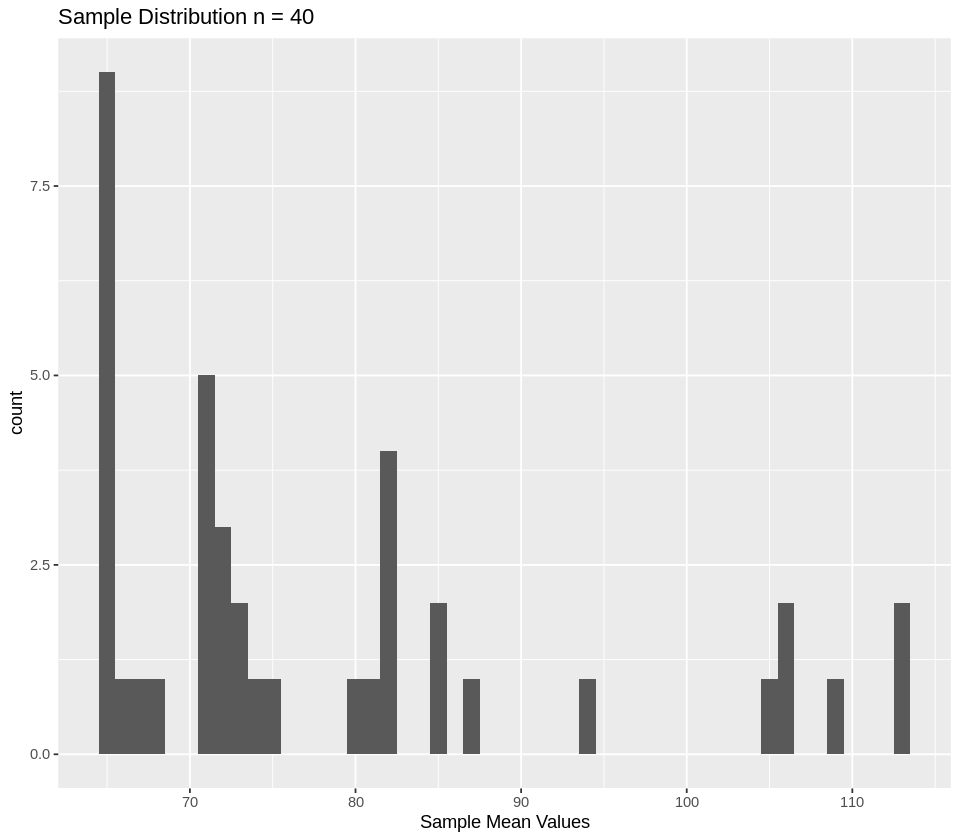

In [25]:
#Question 1.8.0
options(repr.plot.width = 8, repr.plot.height = 7)

boot1_dist <- ggplot(boot1, aes(x=age)) +
  geom_histogram(binwidth = 1) +
  labs(x="Sample Mean Values", title = "Sample Distribution n = 40")

boot1_dist
test_1.8()

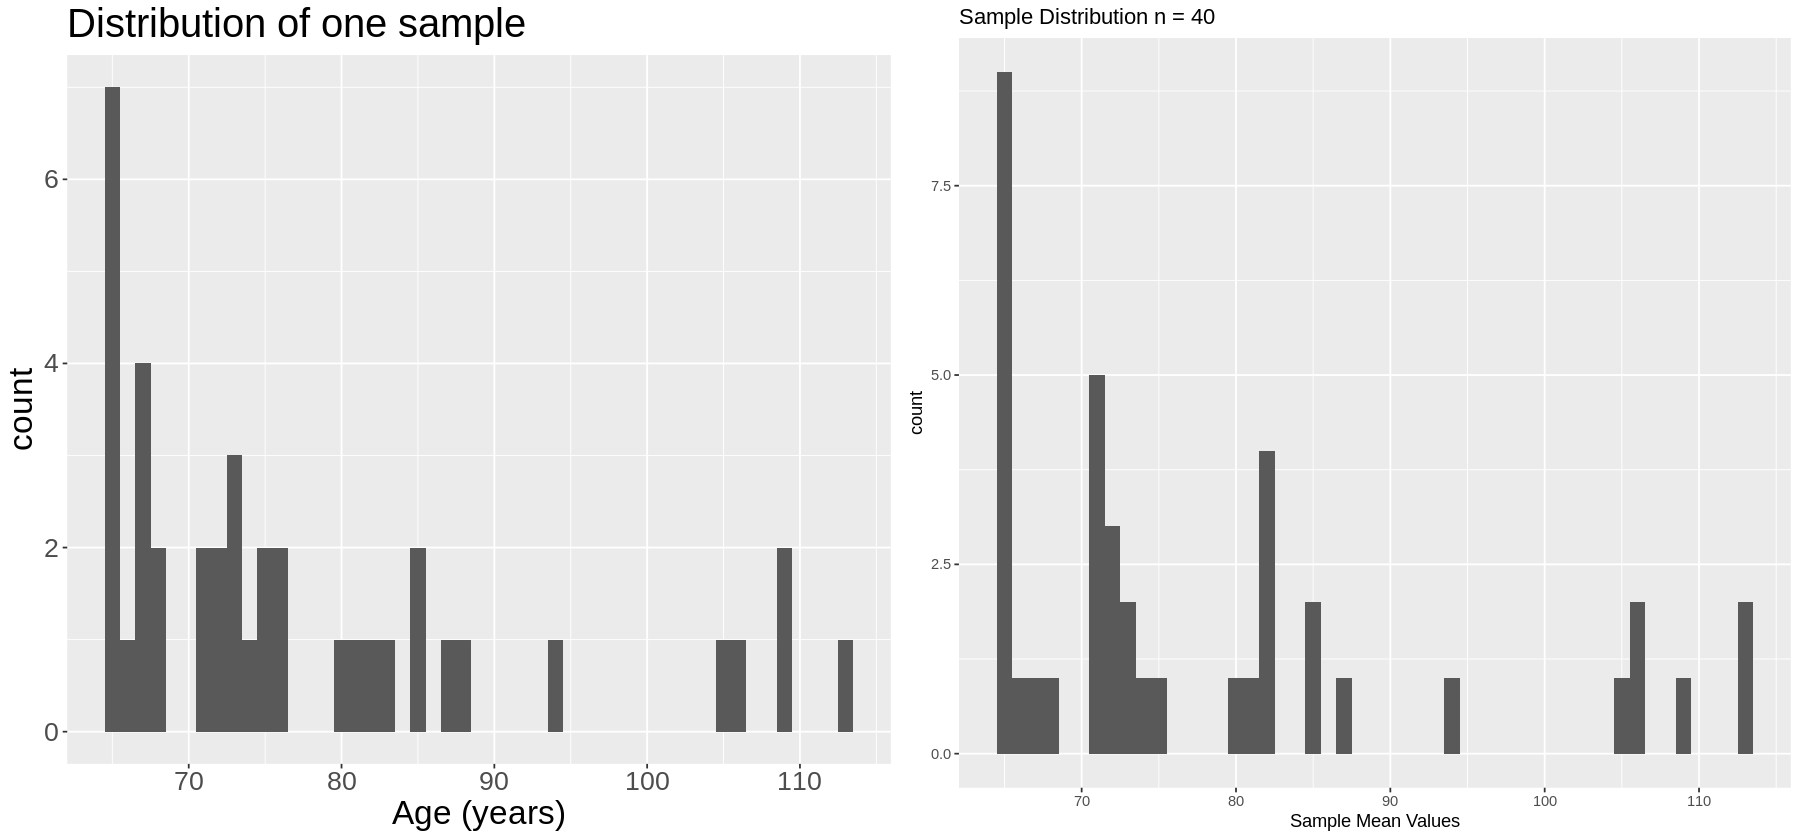

In [26]:
# run this code cell
options(repr.plot.width = 15, repr.plot.height = 7)
plot_grid(one_sample_dist, boot1_dist, ncol = 2)

In [27]:
# run this cell
one_sample_estimates

boot1  %>% 
    summarise(mean = mean(age))

mean
<dbl>
77.8202


replicate,mean
<int>,<dbl>
1,78.60784


In [30]:
#Question 1.9
set.seed(1234)
boot6 <- one_sample %>%
    rep_sample_n(size = 40, replace = TRUE, reps = 6)
  
head(boot6)
tail(boot6)
test_1.9()

replicate,age
<int>,<dbl>
1,87.60507
1,75.37056
1,109.00773
1,65.11363
1,85.30635
1,65.00235


replicate,age
<int>,<dbl>
6,81.12797
6,67.13013
6,71.52872
6,109.00773
6,65.42416
6,108.65109


Test passed 😸
Test passed 🌈
Test passed 🥇
Test passed 😸
[1] "Success!"


Test passed 🎊
Test passed 😸
Test passed 🎊
Test passed 🌈
Test passed 🎉
[1] "Success!"


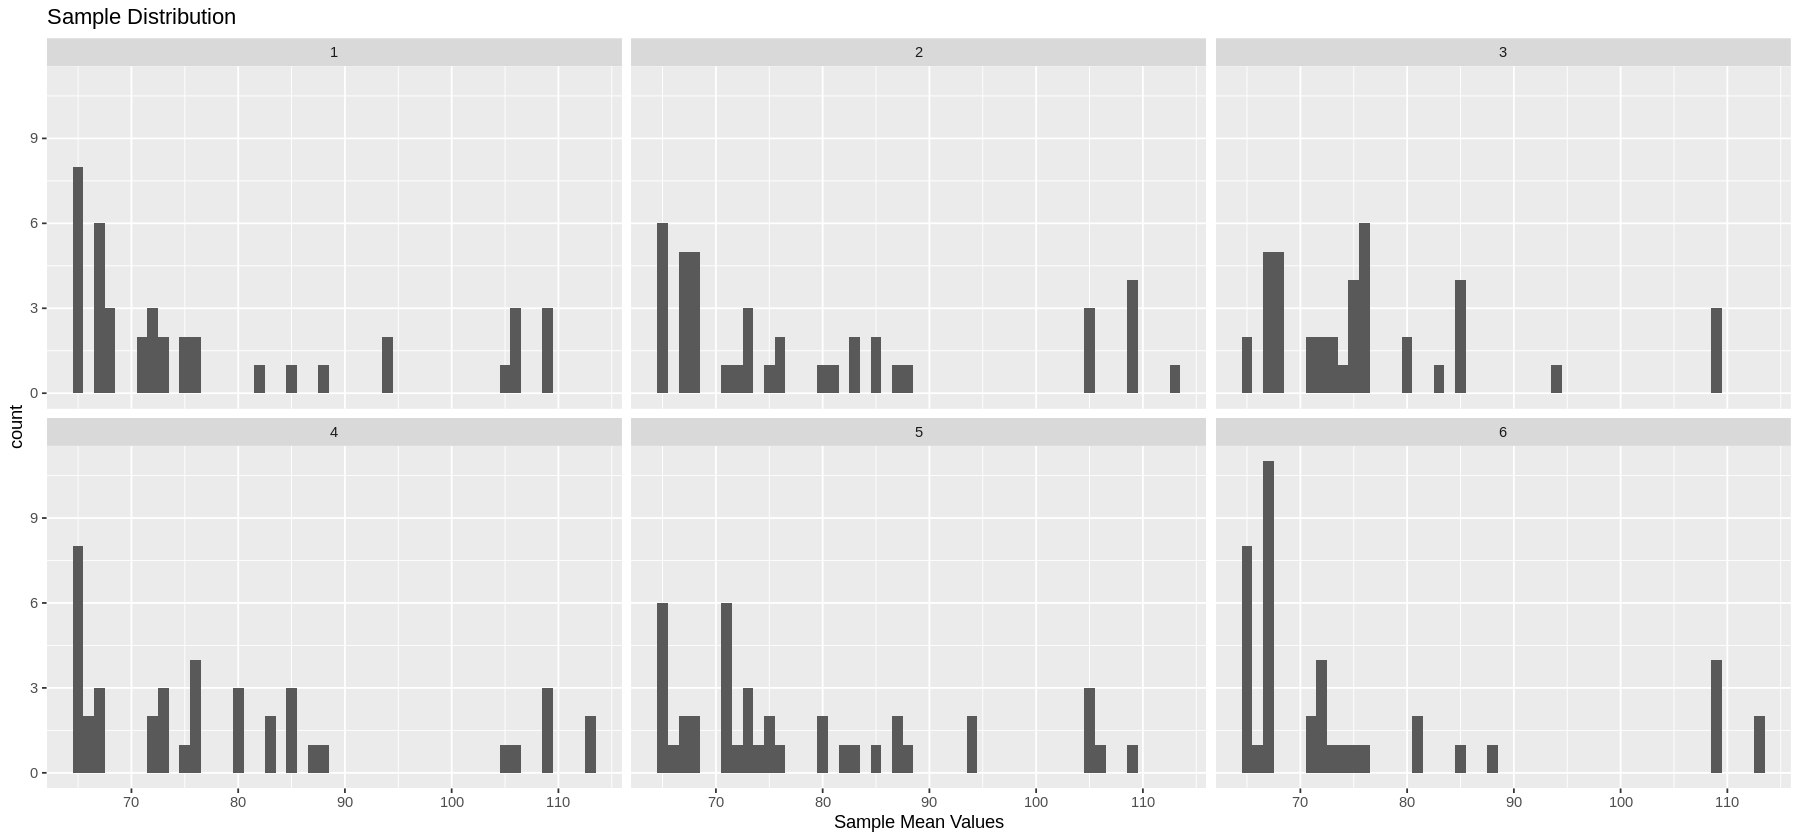

In [31]:
#Question 2.0
options(repr.plot.width = 15, repr.plot.height = 7)
boot6_dist <- ggplot(boot6, aes(x=age)) +
   geom_histogram(binwidth = 1) +
  facet_wrap(~ replicate) +
  labs(x="Sample Mean Values", title= "Sample Distribution")

boot6_dist
test_2.0()

In [35]:
#Question 2.1
boot6_means <- boot6 %>%
  group_by(replicate) %>%
  summarize(mean = mean(age))

boot6_means
test_2.1()

replicate,mean
<int>,<dbl>
1,78.14533
2,79.82831
3,76.74020
4,79.93621
5,78.30400
6,76.17892


Test passed 🥇
[1] "Success!"


In [38]:
#Question 2.2
set.seed(1234)
boot1000 <- one_sample %>%
  rep_sample_n(size = 40, replace = TRUE, reps = 1000)

head(boot1000)
tail(boot1000)
test_2.2()

replicate,age
<int>,<dbl>
1,87.60507
1,75.37056
1,109.00773
1,65.11363
1,85.30635
1,65.00235


replicate,age
<int>,<dbl>
1000,65.03099
1000,65.42416
1000,108.65109
1000,67.32232
1000,106.10351
1000,84.94389


Test passed 🥳
Test passed 🎊
Test passed 🥇
Test passed 🎉
[1] "Success!"


In [39]:
#Question 2.3
boot1000_means <- boot1000 %>%
  group_by(replicate) %>%
  summarize(mean = mean(age))

head(boot1000)
tail(boot1000)
test_2.3()

replicate,age
<int>,<dbl>
1,87.60507
1,75.37056
1,109.00773
1,65.11363
1,85.30635
1,65.00235


replicate,age
<int>,<dbl>
1000,65.03099
1000,65.42416
1000,108.65109
1000,67.32232
1000,106.10351
1000,84.94389


Test passed 🥳
[1] "Success!"


Test passed 🎊
Test passed 😀
Test passed 🌈
Test passed 🌈
[1] "Success!"


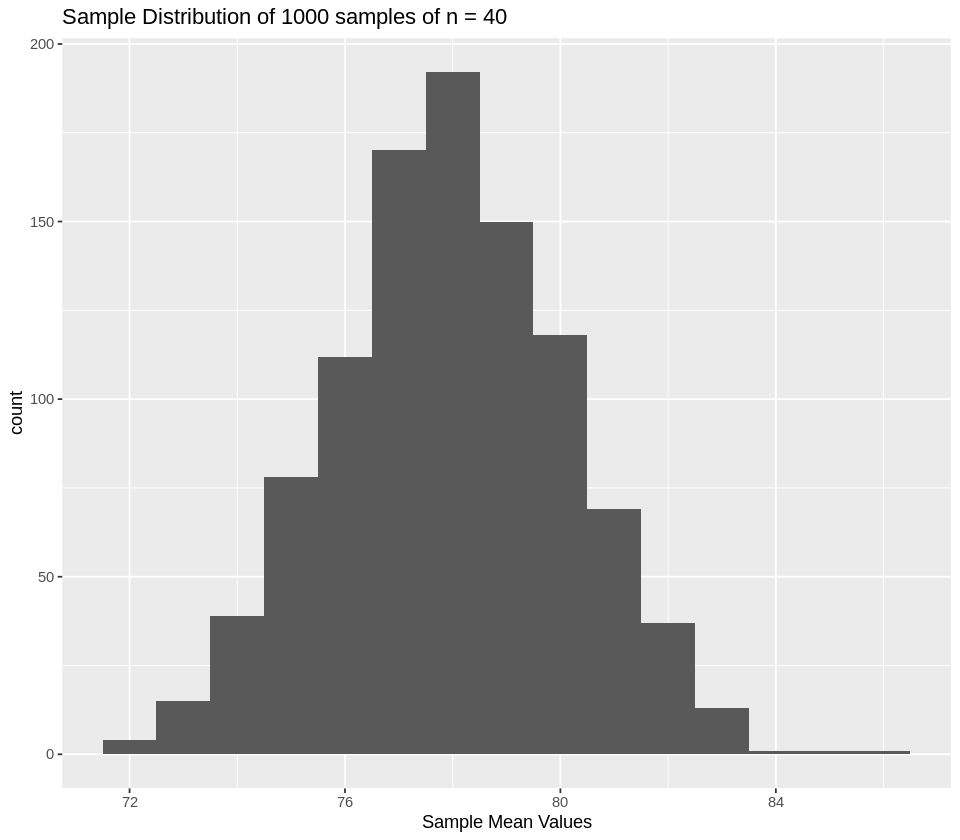

In [41]:
#Question 2.4
options(repr.plot.width = 8, repr.plot.height = 7)

boot_est_dist <- ggplot(boot1000_means, aes(x=mean)) +
  geom_histogram(binwidth = 1) +
  labs(x = "Sample Mean Values", title = "Sample Distribution of 1000 samples of n = 40")
boot_est_dist
test_2.4()

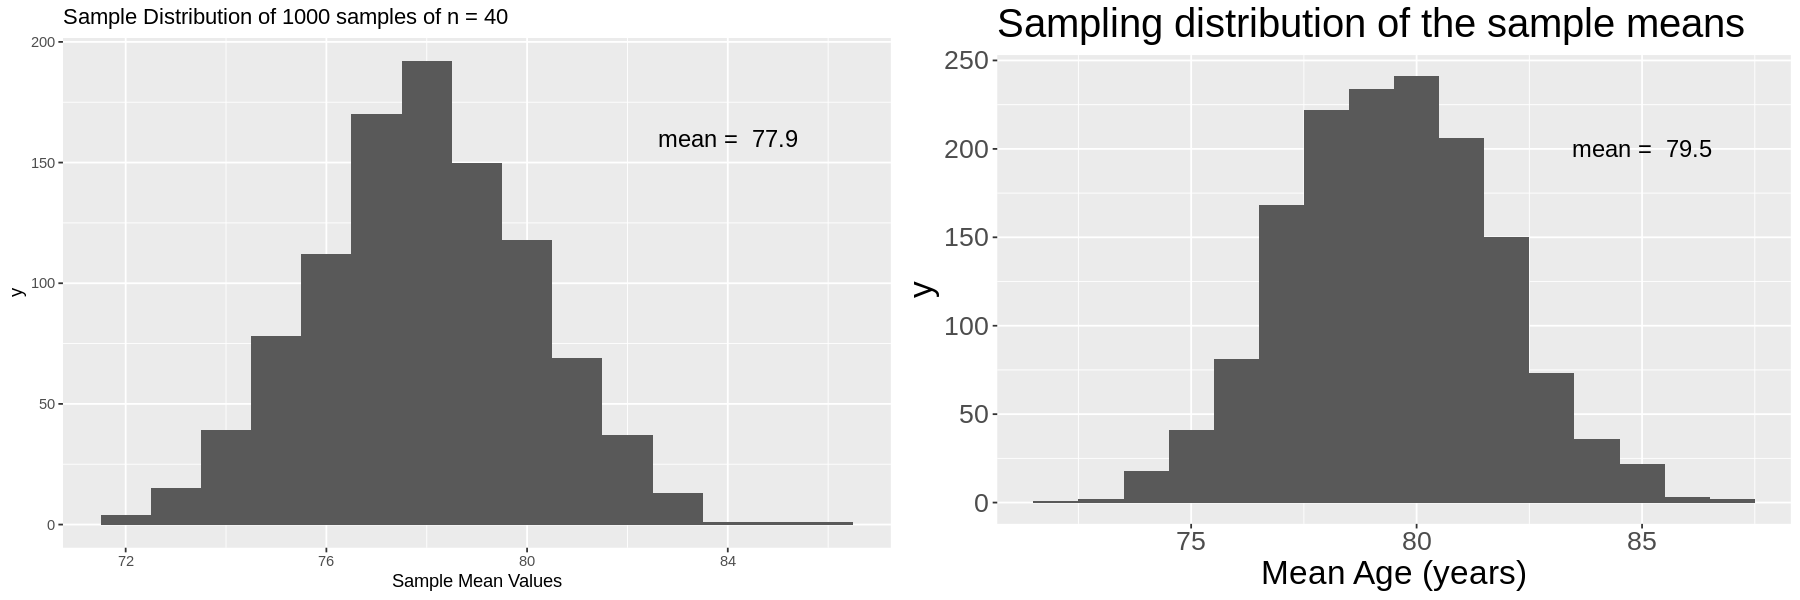

In [42]:
# run this cell

# create sampling distribution histogram
set.seed(4321)
samples <- rep_sample_n(can_seniors, size = 40, reps = 1500)
sample_estimates <- samples %>% 
    group_by(replicate) %>% 
    summarise(mean = mean(age))
sampling_dist <-  ggplot(sample_estimates, aes(x = mean)) +
    geom_histogram(binwidth = 1) +
    xlab("Mean Age (years)") +
    ggtitle("Sampling distribution of the sample means") +
    annotate("text", x = 85, y = 200, label = paste("mean = ", round(mean(sample_estimates$mean), 1)), cex = 5) +
    theme(text = element_text(size = 20))

# annotate distribution mean to the bootstrap dist
boot_est_dist <- boot_est_dist + 
    annotate("text", x = 84, y = 160, label = paste("mean = ", round(mean(boot1000_means$mean), 1)), cex = 5)

# plot bootstrap distribution beside sampling distribution
options(repr.plot.width = 15, repr.plot.height = 5)
plot_grid(boot_est_dist, sampling_dist, ncol = 2)

In [43]:
# run this cell
can_seniors  %>% 
    summarize(mean(age))

mean(age)
<dbl>
79.30102


In [45]:
#Question 2.5
answer2.5 <- "false"
test_2.5()

Test passed 🎊
[1] "Success!"


In [51]:
#Question 2.6
answer2.6 <- "true"
test_2.6()

Test passed 🥇
[1] "Success!"


In [53]:
#Question 2.7
answer2.7 <- "false"

test_2.7()

Test passed 🥇
[1] "Success!"


In [54]:
#Question 2.8
answer2.8 <- "true"
test_2.8()

Test passed 🥳
[1] "Success!"


In [55]:
# run this cell
boot1000_means %>% 
    select(mean) %>% 
    pull() %>% 
    quantile(c(0.025, 0.975))

2.5%    97.5% 
73.72699 82.08650

In [56]:
#Question 2.9
answer2.9 <- "false"
test_2.9()

Test passed 🎉
[1] "Success!"


In [ ]:
#source('cleanup.R')